In [18]:
import os 
from glob import glob

import torch 
from monai.transforms import (
    Compose,
    LoadImaged,
    ToTensord,
    AddChanneld,
)

from monai.data import Dataset, DataLoader
from monai.utils import first
import matplotlib.pyplot as plt

In [19]:
data_dir = '/home/minyoungxi/MINYOUNGXI/MONAI/datasets/Task01_BrainTumour'

In [20]:
# 이미지와 레이블 이름 맞춰서 데이터 정리

train_images = sorted(glob(os.path.join(data_dir, 'TrainData', '*.nii.gz')))
train_labels = sorted(glob(os.path.join(data_dir, 'TrainLabels', '*.nii.gz')))

val_images = sorted(glob(os.path.join(data_dir, 'ValData', '*.nii.gz')))
val_labels = sorted(glob(os.path.join(data_dir, 'ValLabels', '*.nii.gz')))

train_files = [{"image" :image_name, 'label': label_name} for image_name, label_name in zip(train_images, train_labels)]
val_files = [{"image" :image_name, 'label': label_name} for image_name, label_name in zip(val_images, val_labels)]

In [21]:
# load the images 
# do any transforms 
# need to convert them into torch tensors 

train_transforms = Compose(
    [
        LoadImaged(keys=['image', 'label']),
        AddChanneld(keys=['image', 'label']),
        ToTensord(keys=['image', 'label'])
    ]
    
)

val_transforms = Compose(
    [
        LoadImaged(keys=['image', 'label']),
        AddChanneld(keys=['image', 'label']),
        ToTensord(keys=['image', 'label'])
    ]
    
)

/home/minyoungxi/anaconda3/envs/TorchEnv/lib/python3.8/site-packages/monai/utils/deprecate_utils.py:321: FutureWarning: monai.transforms.io.dictionary LoadImaged.__init__:image_only: Current default value of argument `image_only=False` has been deprecated since version 1.1. It will be changed to `image_only=True` in version 1.3.
  warn_deprecated(argname, msg, warning_category)
/home/minyoungxi/anaconda3/envs/TorchEnv/lib/python3.8/site-packages/monai/utils/deprecate_utils.py:111: FutureWarning: <class 'monai.transforms.utility.dictionary.AddChanneld'>: Class `AddChanneld` has been deprecated since version 0.8. It will be removed in version 1.3. please use MetaTensor data type and monai.transforms.EnsureChannelFirstd instead with `channel_dim='no_channel'`.
  warn_deprecated(obj, msg, warning_category)
/home/minyoungxi/anaconda3/envs/TorchEnv/lib/python3.8/site-packages/monai/utils/deprecate_utils.py:221: FutureWarning: monai.transforms.utility.dictionary EnsureChannelFirstd.__init__:m

In [22]:
train_ds = Dataset(data=train_files, transform=train_transforms)
train_loader = DataLoader(train_ds, batch_size=1)

val_ds = Dataset(data=val_files, transform=val_transforms)
val_loader = DataLoader(val_ds, batch_size=1)


In [26]:
test_patient = first(train_loader)
print(test_patient)

{'image': metatensor([[[[[[0., 0., 0., 0.],
            [0., 0., 0., 0.],
            [0., 0., 0., 0.],
            ...,
            [0., 0., 0., 0.],
            [0., 0., 0., 0.],
            [0., 0., 0., 0.]],

           [[0., 0., 0., 0.],
            [0., 0., 0., 0.],
            [0., 0., 0., 0.],
            ...,
            [0., 0., 0., 0.],
            [0., 0., 0., 0.],
            [0., 0., 0., 0.]],

           [[0., 0., 0., 0.],
            [0., 0., 0., 0.],
            [0., 0., 0., 0.],
            ...,
            [0., 0., 0., 0.],
            [0., 0., 0., 0.],
            [0., 0., 0., 0.]],

           ...,

           [[0., 0., 0., 0.],
            [0., 0., 0., 0.],
            [0., 0., 0., 0.],
            ...,
            [0., 0., 0., 0.],
            [0., 0., 0., 0.],
            [0., 0., 0., 0.]],

           [[0., 0., 0., 0.],
            [0., 0., 0., 0.],
            [0., 0., 0., 0.],
            ...,
            [0., 0., 0., 0.],
            [0., 0., 0., 0.],
      

TypeError: Invalid shape (1, 1, 240, 240, 155, 4) for image data

findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font famil

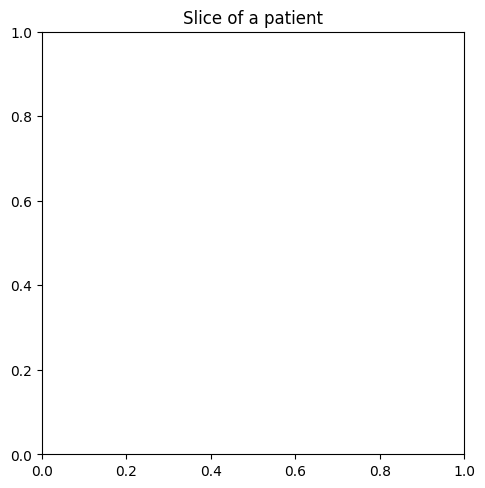

In [28]:
plt.figure('test', (12,6))

plt.subplot(1, 2, 1)
plt.title('Slice of a patient')
plt.imshow(test_patient['image'][0,0, :, :, 30])